# Read Data

In [3]:
import pandas as pd

dataset = pd.read_excel("../week1/data-exercise-1.xls")

dataset

,Semester,Name,Course,Mark,Attended
0,FSS2010,Alex Krausche,Database Systems I,1.3,13
1,FSS2010,Tanja Becker,Database Systems I,2.0,12
2,FSS2010,Mariano Selina,Database Systems I,1.7,5
3,FSS2010,Otto Blacher,Database Systems I,2.3,13
4,FSS2010,Frank Fester,Database Systems I,2.0,13
5,FSS2010,Susanne Müller,Database Systems I,3.0,12
6,FSS2010,Avid Morvita,Database Systems I,4.0,13
7,FSS2010,Steve Queck,Database Systems I,2.7,8
8,FSS2010,Michaela Martke,Database Systems I,5.0,5
9,FSS2010,Ulrich Gester,Database Systems I,5.0,7


# Group Dataset

In [25]:
grouped_df = dataset[["Name", "Attended", "Mark"]].groupby(by=["Name"]).mean()

print(grouped_df)

                  Attended      Mark
Name                                
Alex Krausche    12.500000  1.325000
Avid Morvita     11.333333  3.100000
Frank Fester     11.600000  2.200000
Mariano Selina    6.200000  1.680000
Michaela Martke   7.400000  3.660000
Otto Blacher     11.800000  2.260000
Steve Queck       8.333333  2.800000
Susanne Müller   12.000000  2.433333
Tanja Becker     12.000000  1.666667
Ulrich Gester     8.600000  4.400000


# Normalize

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()

normalized_df = grouped_df.copy()
normalized_df[["Mark", "Attended"]] = scaler.fit_transform(normalized_df[["Mark", "Attended"]])

print(normalized_df)

                 Attended      Mark
Name                               
Alex Krausche    1.000000  0.000000
Avid Morvita     0.814815  0.577236
Frank Fester     0.857143  0.284553
Mariano Selina   0.000000  0.115447
Michaela Martke  0.190476  0.759350
Otto Blacher     0.888889  0.304065
Steve Queck      0.338624  0.479675
Susanne Müller   0.920635  0.360434
Tanja Becker     0.920635  0.111111
Ulrich Gester    0.380952  1.000000


# Cluster

In [47]:
from sklearn.cluster import KMeans

estimator = KMeans(n_clusters=3)

clusters = estimator.fit_predict(normalized_df[["Attended", "Mark"]])

clustered_df = normalized_df.copy()

clustered_df["clusters"] = clusters

clustered_df.sort_values(by="clusters", inplace=True)

print(clustered_df)

                 Attended      Mark  clusters
Name                                         
Alex Krausche    1.000000  0.000000         0
Avid Morvita     0.814815  0.577236         0
Frank Fester     0.857143  0.284553         0
Otto Blacher     0.888889  0.304065         0
Susanne Müller   0.920635  0.360434         0
Tanja Becker     0.920635  0.111111         0
Michaela Martke  0.190476  0.759350         1
Steve Queck      0.338624  0.479675         1
Ulrich Gester    0.380952  1.000000         1
Mariano Selina   0.000000  0.115447         2


# Plot Clusters

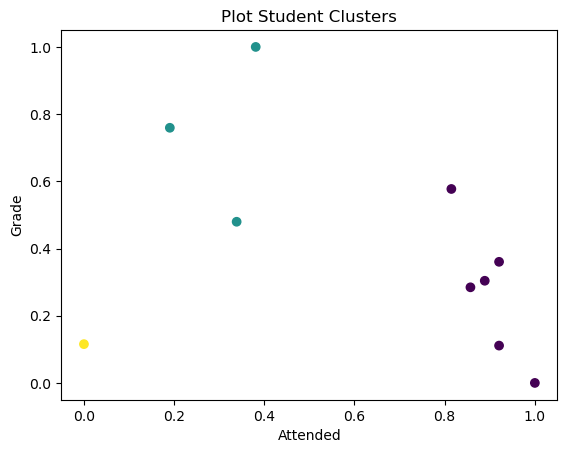

In [48]:
import matplotlib.pyplot as plt

plt.title("Plot Student Clusters")

plt.xlabel("Attended")
plt.ylabel("Grade")

plt.scatter(clustered_df["Attended"], clustered_df["Mark"], c=clustered_df["clusters"])

plt.show()